# XDMoD API Usage Example

The `xdmod` python module provides API access to the data in XDMoD. This notebook
provides an introductory example showing the module usage.

## Import packages
The following imports the XDMoD datawarehouse access module and also some other
modules that will be used in the example.

In [17]:
# import of the XDMoD API
import xdmod.datawarehouse as xdw

# system packages that are used in this example workbook
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from IPython.display import display, Markdown, JSON

## Configuration

To access the data in XDMoD you need to know the URL of the XDMoD instance. You will also need an API key or equivalent authentication information. In this prototype the API key is set to `None` which causes the python code to pull the authentication data from a shell environment variable.

In [18]:
XDMOD_URL = "https://metrics-dev.ccr.buffalo.edu"
XDMOD_API_KEY = None

## Query XDMoD - data exploration

XDMoD data is accessed over a network connection. The `DataWareHouse` _context manager_ is used to manage the connection. The resultant context provides functions that return information about what data are available.

In [22]:
with xdw.DataWareHouse(XDMOD_URL, XDMOD_API_KEY) as x:
    realms = x.realms()
    ood_dimensions = x.dimensions('OnDemand')
    ood_metrics = x.metrics('OnDemand')

# pretty print the various data objects
display(Markdown('# List of available realms\n - ' + "\n - ".join(realms)))
display(Markdown('# Dimensions for the OnDemand realm\n| id | Description |\n|:---|:----|\n|' +
                 "|\n|".join([str(ident) + " | " + str(desc) for ident, desc in ood_dimensions]) + '|\n'))
display(Markdown('# Metrics for the OnDemand realm\n| id | Description |\n|:---|:----|\n|' +
                 "|\n|".join([str(ident) + " | " + str(desc) for ident, desc in ood_metrics]) + '|\n'))

# List of available realms
 - Cloud
 - Jobs
 - OnDemand
 - PCPArchives
 - SUPREMM
 - Storage

# Dimensions for the OnDemand realm
| id | Description |
|:---|:----|
|none | None: Summarizes OnDemand data reported to the Center for Computational Research database.|
|browser | Browser: The web browser that was used to access On Demand. This value is obtained from the user-agent string supplied by the browser|
|location | Location: The location of the broweser that was used to access On Demand. This value is inferred from the IP address in the server logs.|
|oodapplication | OnDemand Application: The Open OnDemand application that was accessed.|
|ooduser | OnDemand Username: The OnDemand username.|
|operatingsys | Operating System: The operating system that was used to access On Demand. This value is obtained from the user-agent string supplied by the browser|
|resource | Resource: A resource is a remote computer that can run jobs.|
|person | User: A person who is on a PIs allocation, hence able run jobs on resources.|


# Metrics for the OnDemand realm
| id | Description |
|:---|:----|
|app_count | Number of Apps: Active: The total number of apps used.|
|page_load_count | Number of Page Loads: The total number of page loads.|
|session_count | Number of Sessions: The total number of sessions. Where a session is defined as one user visit to an app from a distinct IP address per day.|
|sessions_per_user | Number of Sessions: Per User: The total number of sessions per user. Where a session is defined as one user visit to an app from a distinct IP address per day.|
|user_count | Number of Users: Active: The total number of users that used Open OnDemand.|


## Query XDMoD - timeseries data

Typically you would use python's `with` statement to wrap the execution of XDMoD queries, store the result and execute any long running calculations outside of the `with` statement.

The following code uses the `timeseries` function to get a pandas dataframe that contains the number of users per day that used Open OnDemand over a 4 month period.

In [23]:
# Use the python API to get timeseries usage data from the OnDemand data realm in XDMoD
with xdw.DataWareHouse(XDMOD_URL, XDMOD_API_KEY) as x:
    ondemandusage = x.timeseries(start = '2021-01-17', end = '2021-05-17', 
                              realm='OnDemand', metric='user_count', dimension='none')

display(Markdown("**The ondemandusage object has type:** `" + str(type(ondemandusage)) + "`"))

**The ondemandusage object has type:** `<class 'pandas.core.frame.DataFrame'>`

Now we have the data in a python object we can use any python data analysis tools to manipulate or display the data.

Text(0.5, 0.98, '')

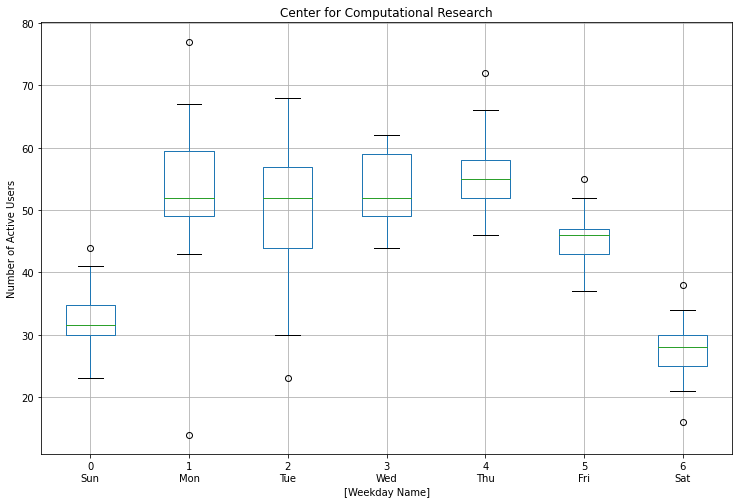

In [24]:
# Add a Day name column
ondemandusage['Weekday Name'] = ondemandusage.index.strftime("%w\n%a")

# Show a box plot of the data grouped by day of the week
ax = ondemandusage.boxplot(by="Weekday Name")
ax.set_ylabel('Number of Active Users')
plt.suptitle('')